In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
#convert str to datetime object
#format='%Y%m%d-%H%M%S'
#20210328-200000
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)

train['dt_obj'] =pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
test['dt_obj'] =pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')

# create a new feature
#df['Age Category'] = 'Over 30'
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
train['year'] = train['dt_obj'].dt.year
train['month'] = train['dt_obj'].dt.month
train['day'] = train['dt_obj'].dt.day
train['hour'] = train['dt_obj'].dt.hour
train['min'] = train['dt_obj'].dt.minute
train['second'] = train['dt_obj'].dt.second
train['dayofweek'] = train["dt_obj"].dt.dayofweek

test['year'] = test['dt_obj'].dt.year
test['month'] = test['dt_obj'].dt.month
test['day'] = test['dt_obj'].dt.day
test['hour'] = test['dt_obj'].dt.hour
test['min'] = test['dt_obj'].dt.minute
test['second'] = test['dt_obj'].dt.second
test['dayofweek'] = test["dt_obj"].dt.dayofweek

In [5]:
train['season']=0

#winter
train.loc[train['month'] == 1 , 'season'] = 1
train.loc[train['month'] == 2 , 'season'] = 1
train.loc[train['month'] == 12 , 'season'] = 1
#spring
train.loc[train['month'] == 3 , 'season'] = 2
train.loc[train['month'] == 4 , 'season'] = 2
train.loc[train['month'] == 5 , 'season'] = 2
#summer
train.loc[train['month'] == 6 , 'season'] = 3
train.loc[train['month'] == 7 , 'season'] = 3
train.loc[train['month'] == 8 , 'season'] = 3

#winter
train.loc[train['month'] == 9, 'season'] = 4
train.loc[train['month'] == 10 , 'season'] = 4
train.loc[train['month'] == 11 , 'season'] = 4

test['season']=0
#winter
test.loc[test['month'] == 1 , 'season'] = 1
test.loc[test['month'] == 2 , 'season'] = 1
test.loc[test['month'] == 12 , 'season'] = 1
#spring
test.loc[test['month'] == 3 , 'season'] = 2
test.loc[test['month'] == 4 , 'season'] = 2
test.loc[test['month'] == 5 , 'season'] = 2
#summer
test.loc[test['month'] == 6 , 'season'] = 3
test.loc[test['month'] == 7 , 'season'] = 3
test.loc[test['month'] == 8 , 'season'] = 3

#winter
test.loc[test['month'] == 9, 'season'] = 4
test.loc[test['month'] == 10 , 'season'] = 4
test.loc[test['month'] == 11 , 'season'] = 4

In [6]:
#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
train['hr_label']=0
#7-9
train.loc[train['hour'] == 7 , 'hr_label'] = 1
train.loc[train['hour'] == 8 , 'hr_label'] = 1
train.loc[train['hour'] == 9 , 'hr_label'] = 1
#11-13
train.loc[train['hour'] == 11 , 'hr_label'] = 2
train.loc[train['hour'] == 12, 'hr_label'] = 2
train.loc[train['hour'] == 13 , 'hr_label'] = 2
#17-18
train.loc[train['hour'] == 17 , 'hr_label'] = 3
train.loc[train['hour'] == 18 , 'hr_label'] = 3



#morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm
#hr_label
test['hr_label']=0
#7-9
test.loc[test['hour'] == 7 , 'hr_label'] = 1
test.loc[test['hour'] == 8 , 'hr_label'] = 1
test.loc[test['hour'] == 9 , 'hr_label'] = 1
#11-13
test.loc[test['hour'] == 11 , 'hr_label'] = 2
test.loc[test['hour'] == 12, 'hr_label'] = 2
test.loc[test['hour'] == 13 , 'hr_label'] = 2
#17-18
test.loc[test['hour'] == 17 , 'hr_label'] = 3
test.loc[test['hour'] == 18 , 'hr_label'] = 3

In [8]:
test['temp_label']=0
#cold
test.loc[test['temp'] <15  , 'temp_label'] = 1
#mild
test.loc[((test['temp'] >= 15) &( test['temp'] <= 26)), 'temp_label'] = 2
#hot
test.loc[test['temp'] > 26 , 'temp_label'] = 3

train['temp_label']=0
#cold
train.loc[train['temp'] <15  , 'temp_label'] = 1
#mild
train.loc[((train['temp'] >= 15) &( train['temp'] <= 26)), 'temp_label'] = 2
#hot
train.loc[train['temp'] > 26 , 'temp_label'] = 3


In [9]:
train['hum_label']=0
#not-hum
train.loc[train['humidity'] <55  , 'hum_label'] = 1
#hum
train.loc[(train['humidity'] >= 55), 'hum_label'] = 2


test['hum_label']=0
#not-hum
test.loc[test['humidity'] <55  , 'hum_label'] = 1
#hum
test.loc[(test['humidity'] >= 55), 'hum_label'] = 2

In [10]:
test['windspeed']=0
#not-windy
test.loc[test['windspeed'] <20  , 'wind_label'] = 1
#windy
test.loc[(test['windspeed'] >= 20), 'wind_label'] = 2

train['windspeed']=0
#not-windy
train.loc[train['windspeed'] <20  , 'wind_label'] = 1
#windy
train.loc[(train['windspeed'] >= 20), 'wind_label'] = 2

test[test['wind_label'] <= 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_obj,...,month,day,hour,min,second,dayofweek,hr_label,temp_label,hum_label,wind_label


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  dt_obj      10886 non-null  datetime64[ns]
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   object        
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   int64         
 9   dt_obj      6493 non-null   datetime64[ns]
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  min         6493 non-null   int64         
 15  second      6493 non-null   int64         
 16  dayofweek   6493 non-nul

In [13]:
train_c=train
train_c = train_c.drop('registered',axis=1)
train_c = train_c.drop('count',axis=1)

train_r=train
train_r = train_r.drop('casual',axis=1)
train_r = train_r.drop('count',axis=1)


In [14]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  dt_obj      10886 non-null  datetime64[ns]
 11  year        10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  min         10886 non-null  int64         
 16  second      10886 non-

In [15]:
train_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   registered  10886 non-null  int64         
 10  dt_obj      10886 non-null  datetime64[ns]
 11  year        10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  min         10886 non-null  int64         
 16  second      10886 non-

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   object        
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   int64         
 9   dt_obj      6493 non-null   datetime64[ns]
 10  year        6493 non-null   int64         
 11  month       6493 non-null   int64         
 12  day         6493 non-null   int64         
 13  hour        6493 non-null   int64         
 14  min         6493 non-null   int64         
 15  second      6493 non-null   int64         
 16  dayofweek   6493 non-nul

In [17]:
predictor_c = TabularPredictor(label="casual").fit(
    train_data=train_c, time_limit=120, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220830_072131\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220830_072131\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 21
Label Column: casual
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	First 10 (of 309) unique label values:  [3, 8, 5, 0, 2, 1, 12, 26, 29, 47]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 5 examples that will be kept for trai

Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1126, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1083, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, **model_fit_kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 587, in fit
    out = self._fit(**kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\ensemble\stacker_ensemble_model.py", line 154, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "C:\Users\Theraphi_WellnessSed\anaconda3\lib\site-packages\autogluon\core\models\ensemble\bagged_ensemble_model.py", line 232, i

In [18]:
y_pred_c = predictor_c.predict(test)

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L1   0.120941      26.760333  47.537564               26.760333          47.537564            1       True          3
1    WeightedEnsemble_L2   0.120941      26.769309  75.768925                0.008976          28.231361            2       True          4
2  KNeighborsUnif_BAG_L1   0.062776       0.387963   0.545959                0.387963           0.545959            1       True          1
3  KNeighborsDist_BAG_L1   0.062776       0.391115   0.104721                0.391115           0.104721            1       True          2
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_KNN', 'StackerEnsembleModel_LGB'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Processe

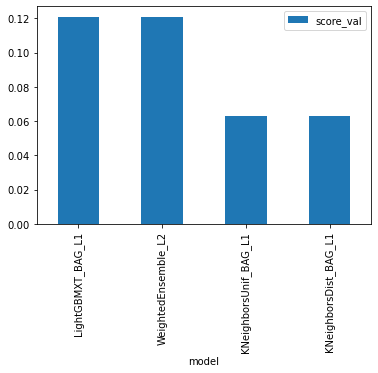

In [19]:
predictor_c.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_c.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

print("AutoGluon infers problem type is: ", predictor_c.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor_c.feature_metadata)

In [20]:
predictor_r = TabularPredictor(label="registered").fit(
    train_data=train_r, time_limit=120, presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220830_072524\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20220830_072524\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    10886
Train Data Columns: 21
Label Column: registered
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (886, 0, 155.55218, 151.03903)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGen

In [21]:
y_pred_r = predictor_r.predict(test)

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2  -26.856247      16.313866  50.564593                0.000000           0.214895            2       True          6
1     WeightedEnsemble_L3  -27.229567      17.499810  60.944786                0.000522           0.185706            3       True          9
2         LightGBM_BAG_L2  -27.275470      17.128451  55.894960                0.091395           5.519363            2       True          8
3         LightGBM_BAG_L1  -27.691332       4.130634  17.579755                4.130634          17.579755            1       True          4
4       LightGBMXT_BAG_L2  -28.154549      17.407893  55.239717                0.370837           4.864119            2       True          7
5       LightGBMXT_BAG_L1  -28.963304      11.722546  26.588871               11.72254

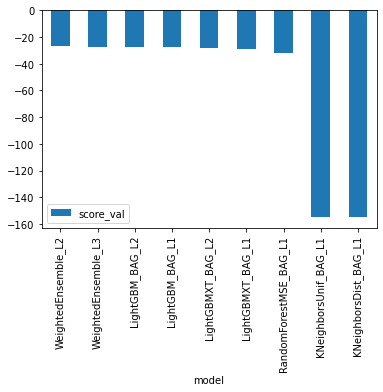

In [22]:
predictor_r.fit_summary()

### Review AutoGluon's training run with ranking of models that did the best.

predictor_r.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

print("AutoGluon infers problem type is: ", predictor_c.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor_r.feature_metadata)

In [31]:
result = pd.concat([y_pred_r, y_pred_c], axis=1, join='inner')

result['count']=(round(result['registered'])+result['casual']).astype('int')

result=result.drop("registered",axis=1)

result=result.drop("casual",axis=1)

result['datetime']=test['datetime']

In [39]:
result[result['count'] < 0]

result.loc[result['count'] < 0 , 'count'] = 0

,count,datetime


In [34]:
submission=result

submission.to_csv("submission.csv", index=False)

In [29]:
import json
kaggle_username = "kanericaws"
kaggle_key = "9c72a930e84f7c1845fbc803dc7adfdc"

!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "second submission with feature enginnering"